In [2]:
%matplotlib inline
import blpapi
import matplotlib.pyplot as plt
import pdblp
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import httplib
import urllib
import json
import sys
import time
import datetime
import oandapy
from sklearn import linear_model, cluster

In [3]:
# Load Bloomberg Connection
con = pdblp.BCon()
con.start()

In [17]:
start_date = "20100101"
end_date = "20170714"
ticker = 'EURUSDV3M BGN Curncy'
vol_df = con.bdh('EURUSDV3M BGN Curncy', 'PX_LAST', start_date = start_date, end_date = end_date)
# kmeans = cluster.KMeans()

In [18]:
len(vol_df)

1966

In [19]:
vol_df[ticker, 'Seq'] = range(0, len(vol_df))

In [66]:
vol_df[ticker, 'dates'] = vol_df[ticker].index

In [69]:
vol_df[ticker, 'dates'].head()

date
2010-01-01   2010-01-01
2010-01-04   2010-01-04
2010-01-05   2010-01-05
2010-01-06   2010-01-06
2010-01-07   2010-01-07
Name: (EURUSDV3M BGN Curncy, dates), dtype: datetime64[ns]

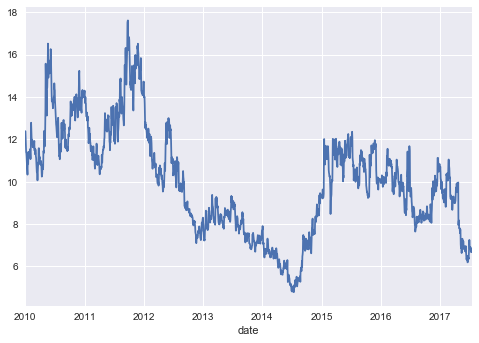

In [64]:
vol_df[ticker, 'PX_LAST'].plot()

## Static K-means

In [51]:
# Reshape the 1D column
X = vol_df[ticker, 'PX_LAST'].reshape(-1,1)
X

array([[ 12.38  ],
       [ 12.    ],
       [ 11.4425],
       ..., 
       [  6.835 ],
       [  6.7875],
       [  6.6825]])

In [52]:
all_k = [cluster.KMeans(n_clusters=i, random_state=0, max_iter=500).fit(X) for i in range(1,20)]

([<matplotlib.axis.XTick at 0x1708d7f0>,
 <a list of 19 Text xticklabel objects>)

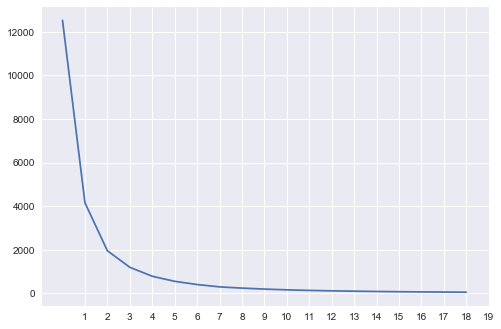

In [57]:
all_k_sse = [i.inertia_ for i in all_k]
plt.plot(all_k_sse)
plt.xticks(np.arange(1, 20, 1.0))

[[  7.4843578 ]
 [ 13.8795339 ]
 [ 10.68923145]]


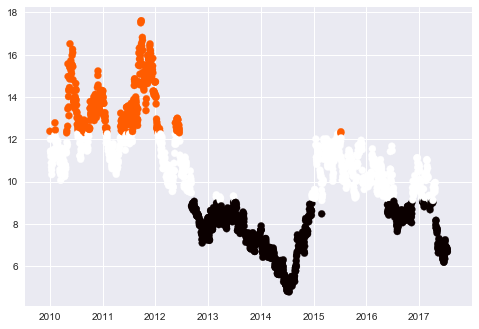

In [174]:
plt.scatter(x= vol_df[ticker].index,y=vol_df[ticker, 'PX_LAST'],  c=all_k[2].labels_, cmap=plt.cm.hot)
print(all_k[2].cluster_centers_)

## K-Means with Rolling 252 Day Window

In [151]:
## Snapshot in Time (shifting 252 window)

start_time = time.time()
max_lab=[]
i = 0
while i < len(vol_df[ticker]):
    tmp = vol_df[ticker,'PX_LAST'][i:i+252].reshape(-1,1)
    tmp_k = cluster.KMeans(n_clusters=3, random_state=0, max_iter=500).fit(tmp)
    max_lab.append(tmp_k.labels_)
    i += 252
    #vol_df[ticker, 'label'+str(i)] = np.nan
    #vol_df[ticker, 'label'+str(i)][i:i+252] = tmp_k.labels_
end_time = time.time()
flat_list = [item for sublist in tmp for item in sublist]

In [176]:
start_time = time.time()
for i in range(0, len(vol_df[ticker])-251):
    tmp = vol_df[ticker,'PX_LAST'][i:i+252].reshape(-1,1)
    tmp_k = cluster.KMeans(n_clusters=3, random_state=0, max_iter=500).fit(tmp)
    vol_df[ticker, 'label'+str(i)] = np.nan
    vol_df[ticker, 'label'+str(i)][i:i+252] = tmp_k.labels_
end_time = time.time()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [177]:
print((end_time - start_time) / 60)

6.32423333327


In [185]:
vol_df.head()

ticker     EURUSDV3M BGN Curncy                                             \
field                   PX_LAST Seq      dates label0 label1 label2 label3   
date                                                                         
2010-01-01              12.3800   0 2010-01-01    0.0    NaN    NaN    NaN   
2010-01-04              12.0000   1 2010-01-04    2.0    1.0    NaN    NaN   
2010-01-05              11.4425   2 2010-01-05    2.0    1.0    1.0    NaN   
2010-01-06              11.3800   3 2010-01-06    2.0    1.0    1.0    1.0   
2010-01-07              11.3650   4 2010-01-07    2.0    1.0    1.0    1.0   

ticker                             ...                                   \
field      label4 label5 label6    ...    label1705 label1706 label1707   
date                               ...                                    
2010-01-01    NaN    NaN    NaN    ...          NaN       NaN       NaN   
2010-01-04    NaN    NaN    NaN    ...          NaN       NaN       NaN   
2010-01-05    NaN    NaN    NaN    ...          NaN       NaN       NaN   
2010-01-06    NaN    NaN    NaN    ...          NaN       NaN       NaN   
2010-01-07    0.0    NaN    NaN    ...          NaN       NaN       NaN   

ticker                                                                  \
field      label1708 label1709 label1710 label1711 label1712 label1713   
date                                                                     
2010-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   

ticker                
field      label1714  
date                  
2010-01-01       NaN  
2010-01-04       NaN  
2010-01-05       NaN  
2010-01-06       NaN  
2010-01-07       NaN  

[5 rows x 1718 columns]

In [200]:
map_list = []
for i in range(0,vol_df[ticker].shape[0]):
    tmp = vol_df[ticker].iloc[i,3:]
    map_list.append(tmp[tmp.last_valid_index()])

In [201]:
map_list

[0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0

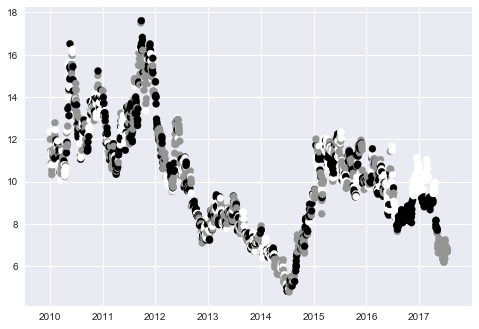

In [202]:
plt.scatter(x=vol_df[ticker].index,y=vol_df[ticker, 'PX_LAST'], c=map_list)

In [2]:
mat = np.matrix('0.94 0.06 0; 0.12 0.79 0.09; 0 0.16 0.84')
mat

matrix([[ 0.94,  0.06,  0.  ],
        [ 0.12,  0.79,  0.09],
        [ 0.  ,  0.16,  0.84]])

In [3]:
vec = np.matrix('1 0 0')
vec

matrix([[1, 0, 0]])

In [4]:
result = np.dot(vec, np.linalg.matrix_power(mat, 20))

In [ ]:
result_list

In [5]:
for i in range(0,2000):
    result = np.dot(vec, np.linalg.matrix_power(mat, i))
    result_list.append(result[0,1])

NameError: name 'result_list' is not defined

In [ ]:
result_list